<a href="https://colab.research.google.com/github/bhavinf/New_York_Motor_Vehicle_Collision/blob/main/New_York_Motor_Vehicle_Collision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("/content/Motor_Vehicle_Collisions.csv", low_memory=False)

# Combining date & time
df["CRASH_DATETIME"] = pd.to_datetime(df["CRASH DATE"] + " " + df["CRASH TIME"], errors='coerce')
df["CRASH_YEAR"] = df["CRASH_DATETIME"].dt.year
df["CRASH_MONTH"] = df["CRASH_DATETIME"].dt.month
df["CRASH_HOUR"] = df["CRASH_DATETIME"].dt.hour
df["CRASH_DAY"] = df["CRASH_DATETIME"].dt.day
df["CRASH_WEEKDAY"] = df["CRASH_DATETIME"].dt.day_name()

# Dropping irrelevant columns
df = df.drop(columns=[
    "LOCATION", "OFF STREET NAME", "COLLISION_ID",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5",
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"
], errors='ignore')

# Showing basic info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034019 entries, 0 to 2034018
Data columns (total 26 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     object        
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   NUMBER OF PERSONS INJURED      float64       
 9   NUMBER OF PERSONS KILLED       float64       
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

(2034019, 26)

In [33]:
!pip install -q pandasql


In [34]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [35]:
query = "SELECT COUNT(*) as total_records FROM df"
result = pysqldf(query)
print(result)


   total_records
0        2034019


In [36]:
query = """
SELECT
  BOROUGH,
  COUNT(*) AS total_collisions
FROM df
WHERE BOROUGH IS NOT NULL
GROUP BY BOROUGH
ORDER BY total_collisions DESC
"""
pysqldf(query)


,BOROUGH,total_collisions
0,BROOKLYN,444936
1,QUEENS,375361
2,MANHATTAN,315278
3,BRONX,206913
4,STATEN ISLAND,58744


In [37]:
query = """
SELECT
  `VEHICLE TYPE CODE 1` AS vehicle_type,
  COUNT(*) AS total_collisions
FROM df
WHERE `VEHICLE TYPE CODE 1` IS NOT NULL
GROUP BY vehicle_type
ORDER BY total_collisions DESC
LIMIT 10
"""
pysqldf(query)


,vehicle_type,total_collisions
0,Sedan,557795
1,Station Wagon/Sport Utility Vehicle,438959
2,PASSENGER VEHICLE,416206
3,SPORT UTILITY / STATION WAGON,180291
4,Taxi,50371
5,4 dr sedan,40162
6,Pick-up Truck,33714
7,TAXI,31911
8,VAN,25266
9,Box Truck,23692


In [38]:
query = """
SELECT
  `VEHICLE TYPE CODE 1` AS vehicle_1,
  `VEHICLE TYPE CODE 2` AS vehicle_2,
  COUNT(*) AS combination_count
FROM df
WHERE
  `VEHICLE TYPE CODE 1` IS NOT NULL AND
  `VEHICLE TYPE CODE 2` IS NOT NULL
GROUP BY vehicle_1, vehicle_2
ORDER BY combination_count DESC
LIMIT 10
"""
pysqldf(query)


,vehicle_1,vehicle_2,combination_count
0,Sedan,Sedan,200100
1,PASSENGER VEHICLE,PASSENGER VEHICLE,193260
2,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,135170
3,Sedan,Station Wagon/Sport Utility Vehicle,125032
4,Station Wagon/Sport Utility Vehicle,Sedan,124849
5,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,63053
6,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,62982
7,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,50156
8,PASSENGER VEHICLE,UNKNOWN,49073
9,SPORT UTILITY / STATION WAGON,UNKNOWN,19412


In [39]:
query = """
SELECT
  `CONTRIBUTING FACTOR VEHICLE 1` AS cause,
  COUNT(*) AS total_collisions
FROM df
WHERE `CONTRIBUTING FACTOR VEHICLE 1` IS NOT NULL
GROUP BY cause
ORDER BY total_collisions DESC
LIMIT 10
"""
pysqldf(query)


,cause,total_collisions
0,Unspecified,696526
1,Driver Inattention/Distraction,405234
2,Failure to Yield Right-of-Way,120244
3,Following Too Closely,108440
4,Backing Unsafely,75459
5,Other Vehicular,63152
6,Passing or Lane Usage Improper,56099
7,Passing Too Closely,50354
8,Turning Improperly,50299
9,Fatigued/Drowsy,47362


In [40]:
query = """
SELECT
  SUM(`NUMBER OF PERSONS INJURED`) AS persons_injured,
  SUM(`NUMBER OF PERSONS KILLED`) AS persons_killed,
  SUM(`NUMBER OF PEDESTRIANS INJURED`) AS pedestrians_injured,
  SUM(`NUMBER OF PEDESTRIANS KILLED`) AS pedestrians_killed,
  SUM(`NUMBER OF CYCLIST INJURED`) AS cyclists_injured,
  SUM(`NUMBER OF CYCLIST KILLED`) AS cyclists_killed,
  SUM(`NUMBER OF MOTORIST INJURED`) AS motorists_injured,
  SUM(`NUMBER OF MOTORIST KILLED`) AS motorists_killed
FROM df
"""
pysqldf(query)


,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclists_injured,cyclists_killed,motorists_injured,motorists_killed
0,619645.0,2966.0,112779,1477,53771,230,446303,1216


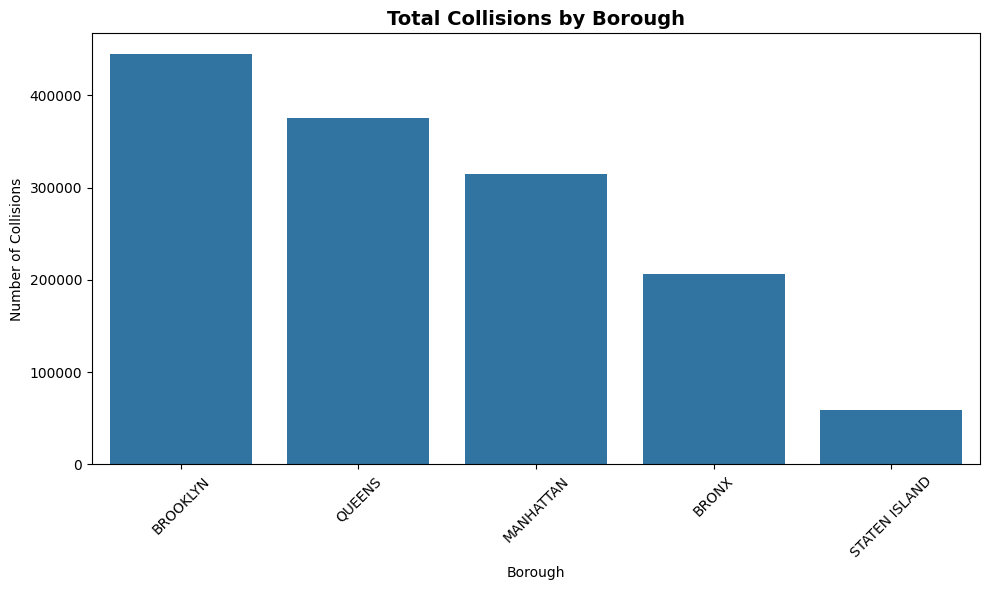

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='BOROUGH', order=df['BOROUGH'].value_counts().index)
plt.title("Total Collisions by Borough", fontsize=14, fontweight='bold')
plt.ylabel("Number of Collisions")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


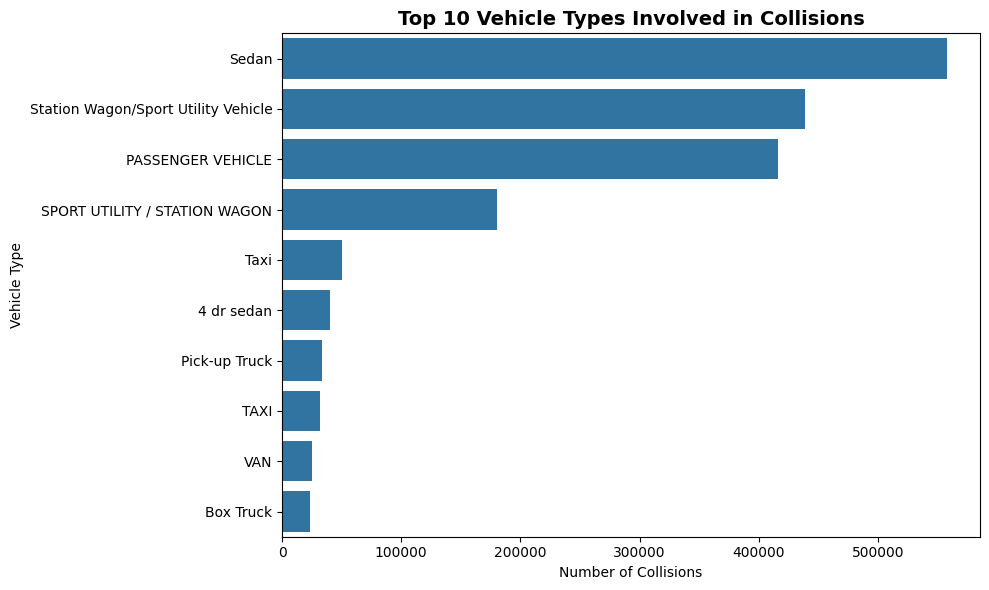

In [42]:
top_vehicles = df['VEHICLE TYPE CODE 1'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_vehicles.values, y=top_vehicles.index)
plt.title("Top 10 Vehicle Types Involved in Collisions", fontsize=14, fontweight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()


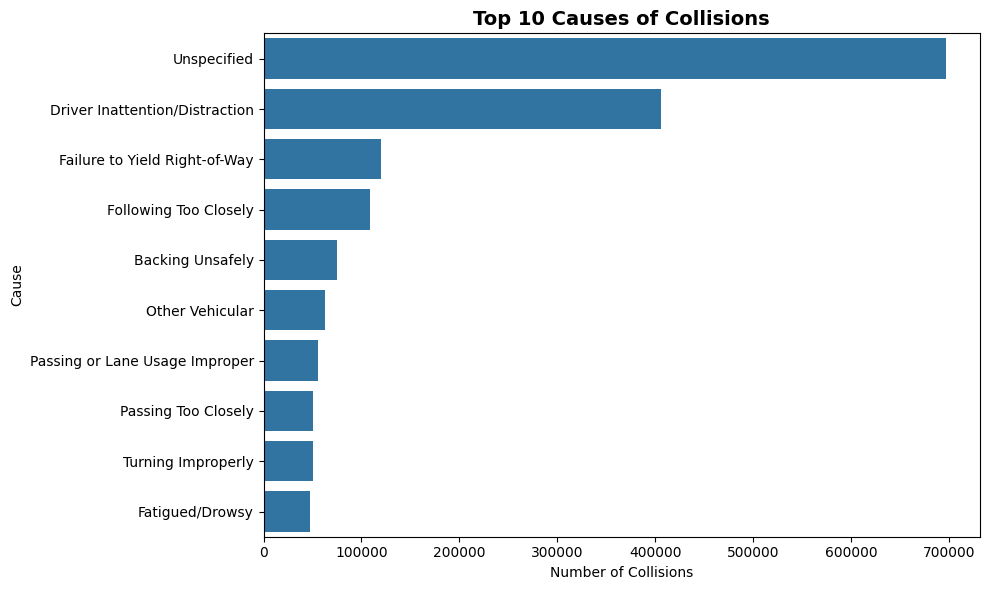

In [43]:
top_causes = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_causes.values, y=top_causes.index)
plt.title("Top 10 Causes of Collisions", fontsize=14, fontweight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()


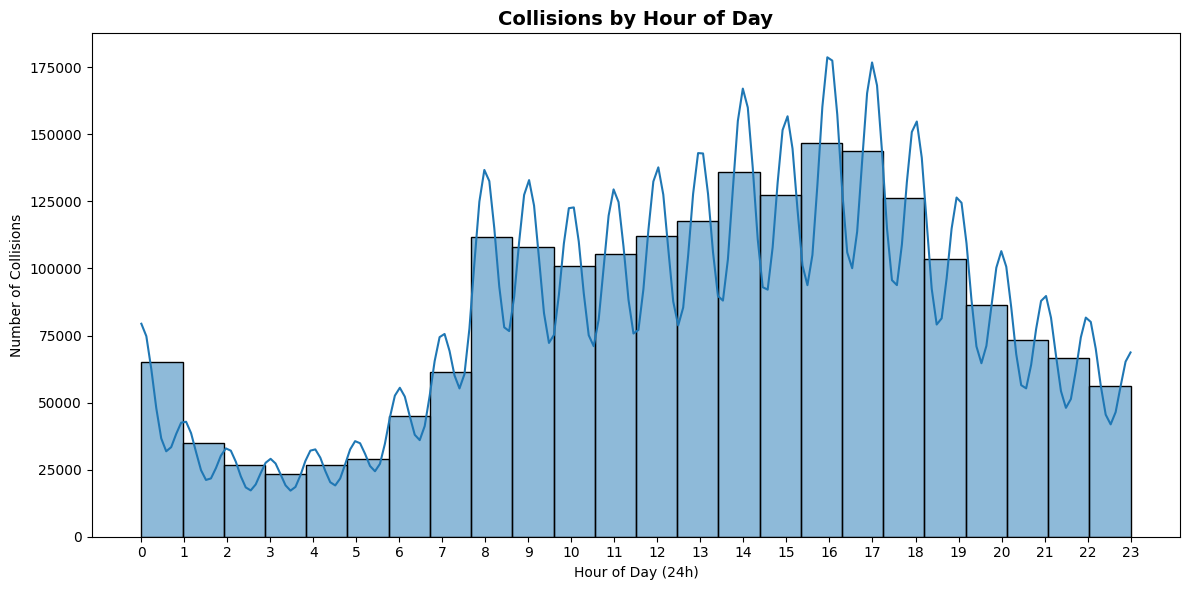

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='CRASH_HOUR', bins=24, kde=True)
plt.title("Collisions by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Collisions")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


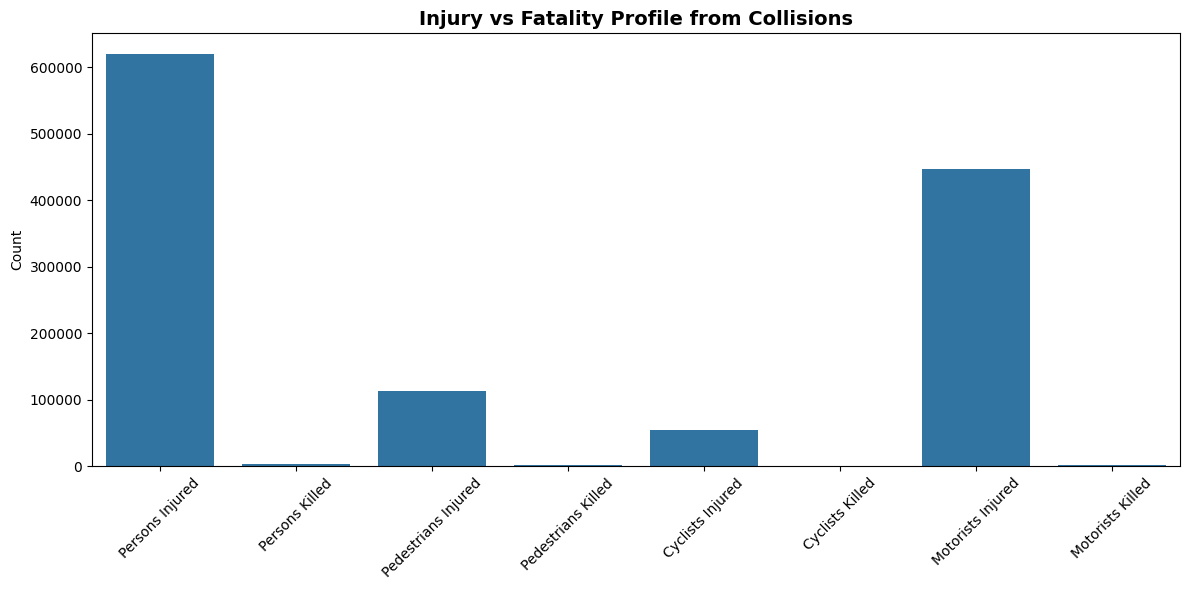

In [45]:
injured_killed = {
    'Persons Injured': df['NUMBER OF PERSONS INJURED'].sum(),
    'Persons Killed': df['NUMBER OF PERSONS KILLED'].sum(),
    'Pedestrians Injured': df['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Pedestrians Killed': df['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclists Injured': df['NUMBER OF CYCLIST INJURED'].sum(),
    'Cyclists Killed': df['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorists Injured': df['NUMBER OF MOTORIST INJURED'].sum(),
    'Motorists Killed': df['NUMBER OF MOTORIST KILLED'].sum(),
}

plt.figure(figsize=(12,6))
sns.barplot(x=list(injured_killed.keys()), y=list(injured_killed.values()))
plt.title("Injury vs Fatality Profile from Collisions", fontsize=14, fontweight='bold')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
